In [148]:
import numpy as np

class Plane:
    def __init__(self, coef, b, plane_id = -1):
        norm = np.linalg.norm(coef)
        self.perp_vec = coef / norm
        self.b = b / norm
        self.dimension = coef.shape[0]
        self.plane_id = plane_id

        pt_on_plane = [0] * self.dimension
        for i, c in np.ndenumerate(coef):
            indx = i[0]
            if abs(c) > 1e-8:
                pt_on_plane[indx] = b / c
                break
        self.pt_on_plane = pt_on_plane

    def pt_in_half_plane(self, pt):
        return np.dot(pt, self.perp_vec) < self.b + 1e-8

    def pt_on_hyperplane(self, pt):
        diff = abs(np.dot(pt, self.perp_vec) - self.b)
        return diff < 1e-8

    def line_intersection(self, point, direction) :
        num = self.b - np.dot(point, self.perp_vec)
        denom = np.dot(direction, self.perp_vec)
        t = num / denom
        if t < -1e-8: t = 1e5
        return point + direction * t

    def projection(self, point):
        return self.line_intersection(point, 1 * self.perp_vec);

    def reflect(self, point, direction):
        # return self.reflect_function(point, direction)

        # move everything to origin
        intersection = self.line_intersection(point, direction)
        pp = point - self.pt_on_plane

        dd = direction

        # mirror the point across the hyperplane
        proj = self.perp_vec * np.dot(pp, self.perp_vec) \
               / np.dot(self.perp_vec, self.perp_vec)

        mirror = pp - 2 * proj + self.pt_on_plane
        direction = intersection - mirror

        direction = direction / np.linalg.norm(direction)

        return (intersection, direction)

class Ball:
    def __init__(self, center, radius, index):
        self.center = center
        self.radius = radius
        self.index = index

    def pt_inside(self, pt):
        dist = np.linalg.norm(pt - self.center)

        if dist < self.radius + 1e-8:
            return True
        return False

    def does_intersect(self, o, l) :
        c = self.center
        r = self.radius
        
        if np.dot(c - o, l) < 0: return False

        l = l / np.linalg.norm(l)

        a = - (np.dot(l, o - c))
        b = (np.dot(l, (o - c)) ** 2) - (np.linalg.norm(o - c) ** 2) + r*r
        return b >= -1e-8

    '''
    circle centered at c, of radius r
    line: x = o + d * l (origin o, direction l)
    '''
    def line_intersection(self, o, l):
        c = self.center
        r = self.radius

        l = l / np.linalg.norm(l)

        a = - (np.dot(l, o - c))
        b = (np.dot(l, (o - c)) ** 2) - (np.linalg.norm(o - c) ** 2) + r*r
        b = np.sqrt(b)

        d1 = a + b
        d2 = a - b

        p1 = o + d1 * l
        p2 = o + d2 * l

        if np.linalg.norm(p1 - o) < np.linalg.norm(p2 - o):
            return p1
        return p2

    def reflection(self, pt, direction):
        hit_on_sphere = self.line_intersection(pt, direction)

        perp = hit_on_sphere - self.center
        b = np.dot(perp, hit_on_sphere)
        plane = Plane(perp, b)

        p, d = plane.reflect(pt, direction)
        return p, d
    
    def angle(self, pt, direction): 
        v = pt - self.center
        v /= np.linalg.norm(v)
        d = direction / np.linalg.norm(direction)
        return np.arccos(np.dot(v, d))


In [163]:
def run(N, balls, index, pt, d): 
    
    angles = []
    pts = []
    for _ in range(N): 
        
        dist = 1e9
        hit_ball = None
        for ball in balls: 
            if ball.index == index: 
                continue
                
            idx = -1
            if ball.does_intersect(pt, d): 
                hit = ball.line_intersection(pt, d)
                if np.linalg.norm(hit - pt) < dist: 
                    dist = np.linalg.norm(hit - pt)
                    hit_ball = ball
            
        index = hit_ball.index
        pt, d = hit_ball.reflection(pt, d)
                  
        pts.append(pt)
        angles.append(ball.angle(pt, d))
    return pts, angles

In [164]:
radius = 0.75
balls = [Ball(np.array([-1, 0]), radius, 0), Ball(np.array([1, 0]), radius, 1), Ball(np.array([0, -1]), radius, 2), Ball(np.array([0, 1]), radius, 3)]

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

def circ(x, y, r, phi):
    return (x + r * np.cos(phi), y + r*np.sin(phi))

def plot_circle(x, y, r):
    phis = np.arange(0,6.28,0.01)
    plt.plot(*circ(x, y, r, phis), c = 'r')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')

def draw_balls(balls): 
    for ball in balls: 
        plot_circle(ball.center[0], ball.center[1], ball.radius)
        
def plot_orbit(pts): 
    for i in range(len(pts) - 1):
        plt.plot([pts[i][0], pts[i+1][0]], [pts[i][1], pts[i+1][1]], color = 'blue')

<Figure size 720x720 with 0 Axes>

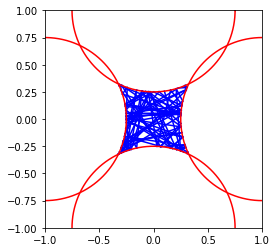

In [170]:
res = run(100, balls, -1, np.array([0.1,0]), np.array([0,1]))

plot_orbit(res[0])
draw_balls(balls)

In [ ]:
)